<a href="https://colab.research.google.com/github/manu675/analytics_cup_21/blob/main/AC_python_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Analytics - Analytics Cup 21

In [1]:
# importing libaries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, roc_curve, roc_auc_score

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [96]:
## Way 2: uploading the local data to google colab
# importing local data to google colab:
from google.colab import files
uploaded = files.upload()


Saving test_physicians_.csv to test_physicians_.csv


In [88]:
## Way 2: uploading the local data to google colab
# importing local data to google colab:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: ignored

In [65]:
train = pd.read_csv("train_physicians.csv")

In [97]:
test = pd.read_csv("test_physicians_.csv")

In [8]:
train.head()

,Physician_ID,State,Primary_Specialty,ownership_interest,total_payments,number_of_payments
0,1,FL,Allopathic & Osteopathic Physicians|Obstetrics...,0,952.93,47
1,2,MD,Allopathic & Osteopathic Physicians|Anesthesio...,0,120924.92,154
2,3,NY,Podiatric Medicine & Surgery Service Providers...,0,3523.93,132
3,4,GA,Allopathic & Osteopathic Physicians|Internal M...,0,26745.61,411
4,5,NM,Allopathic & Osteopathic Physicians|Orthopaedi...,0,25411.21,98


In [98]:
test.head()

,Physician_ID,State,Primary_Specialty,total_payments,number_of_payments
0,14,FL,Allopathic & Osteopathic Physicians|Pain Medic...,5775.53,539
1,18,NY,Allopathic & Osteopathic Physicians|Internal M...,92123.24,584
2,42,NY,Allopathic & Osteopathic Physicians|Obstetrics...,3159.49,180
3,46,MI,NaN,1614.34,64
4,47,MD,Allopathic & Osteopathic Physicians|Internal M...,6494.00,296


In [99]:
test.shape

(1000, 5)

In [13]:
train = train.set_index('Physician_ID')

In [14]:
# labels 
y_train = train["ownership_interest"][0:4000]

y_test = train["ownership_interest"][4001:5000]

print(y_train, y_test)

Physician_ID
1       0
2       0
3       0
4       0
5       0
       ..
5027    0
5028    0
5029    0
5030    1
5031    0
Name: ownership_interest, Length: 4000, dtype: int64 Physician_ID
5033    0
5034    0
5035    0
5036    0
5037    0
       ..
5995    0
5996    0
5997    0
5998    0
6000    0
Name: ownership_interest, Length: 787, dtype: int64


In [28]:
# features (manually)
X_train = train[["total_payments","number_of_payments"]][0:4000]

X_test = train[["total_payments","number_of_payments"]][4001:5000]

Preprocessing

In [ ]:
df = pd.read_csv('df.csv')


In [ ]:
df.head()

,Physician_ID,set,City,State,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Total_Payments,Ownership_Payments_Count,Ownership_Interest
0,1,train,FORT PIERCE,FL,Allopathic & Osteopathic Physicians|Obstetrics...,FL,NaN,NaN,NaN,NaN,952.93,0,False
1,2,train,TOWSON,MD,Allopathic & Osteopathic Physicians|Anesthesio...,MD,NaN,NaN,NaN,NaN,120924.92,0,False
2,3,train,TROY,NY,Podiatric Medicine & Surgery Service Providers...,NY,NaN,NaN,NaN,NaN,3523.93,0,False
3,4,train,SAVANNAH,GA,Allopathic & Osteopathic Physicians|Internal M...,GA,SC,AL,NaN,NaN,26745.61,0,False
4,5,train,ALBUQUERQUE,NM,Allopathic & Osteopathic Physicians|Orthopaedi...,NM,NaN,NaN,NaN,NaN,25411.21,0,False


In [ ]:
df.columns

Index(['Physician_ID', 'set', 'City', 'State', 'Primary_Specialty',
       'License_State_1', 'License_State_2', 'License_State_3',
       'License_State_4', 'License_State_5', 'Total_Payments',
       'Ownership_Payments_Count', 'Ownership_Interest'],
      dtype='object')

In [ ]:
# Set ID as the index of your data and then do the split, that way you will retain the ID value for all of your train and test data

df = df.set_index('Physician_ID')

In [ ]:
df.head()

,set,City,State,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Total_Payments,Ownership_Payments_Count,Ownership_Interest
Physician_ID,,,,,,,,,,,,
1,train,FORT PIERCE,FL,Allopathic & Osteopathic Physicians|Obstetrics...,FL,NaN,NaN,NaN,NaN,952.93,0,False
2,train,TOWSON,MD,Allopathic & Osteopathic Physicians|Anesthesio...,MD,NaN,NaN,NaN,NaN,120924.92,0,False
3,train,TROY,NY,Podiatric Medicine & Surgery Service Providers...,NY,NaN,NaN,NaN,NaN,3523.93,0,False
4,train,SAVANNAH,GA,Allopathic & Osteopathic Physicians|Internal M...,GA,SC,AL,NaN,NaN,26745.61,0,False
5,train,ALBUQUERQUE,NM,Allopathic & Osteopathic Physicians|Orthopaedi...,NM,NaN,NaN,NaN,NaN,25411.21,0,False


In [ ]:
df.columns

Index(['set', 'City', 'State', 'Primary_Specialty', 'License_State_1',
       'License_State_2', 'License_State_3', 'License_State_4',
       'License_State_5', 'Total_Payments', 'Ownership_Payments_Count',
       'Ownership_Interest'],
      dtype='object')

In [ ]:
# dimensionality of the df
df.shape

(6000, 12)

In [ ]:
# pairwise correlations of the columns
df.corr()

,Total_Payments,Ownership_Payments_Count,Ownership_Interest
Total_Payments,1.000000,0.189993,0.111417
Ownership_Payments_Count,0.189993,1.000000,0.473958
Ownership_Interest,0.111417,0.473958,1.000000


In [ ]:
# frequency table
df["set"].value_counts()

train    5000
test     1000
Name: set, dtype: int64

In [ ]:
# frequency table of the target variable -> imbalanced among classes
df["Ownership_Interest"].value_counts()

False    5700
True      300
Name: Ownership_Interest, dtype: int64

In [ ]:
# frequency table
df["Ownership_Payments_Count"].value_counts()

0     5700
1      141
2       33
3       19
4       14
5       10
8        5
12       5
14       5
13       5
9        4
15       4
27       4
7        3
19       3
29       3
22       3
20       3
16       3
10       3
6        2
49       2
18       2
11       2
76       1
63       1
59       1
43       1
39       1
31       1
24       1
32       1
36       1
44       1
88       1
75       1
92       1
23       1
62       1
38       1
21       1
25       1
34       1
33       1
41       1
79       1
Name: Ownership_Payments_Count, dtype: int64

In [ ]:
# labels 
y_train = df["Ownership_Interest"][df["set"] == "train"]

y_test = df["Ownership_Interest"][df["set"] == "test"]


In [ ]:
y_test.unique()

array([False])

In [ ]:
# features (manually)
X_train = df[["Total_Payments","Ownership_Payments_Count"]][df["set"] == "train"]

X_test = df[["Total_Payments","Ownership_Payments_Count"]][df["set"] == "test"]

In [29]:
# train test split (taking 70% of the labeled training data as the training set and and 30% of the labelled training data as a validation set
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,shuffle=False)


print(X_train, X_test, y_train, y_test)

              total_payments  number_of_payments
Physician_ID                                    
1                     952.93                  47
2                  120924.92                 154
3                    3523.93                 132
4                   26745.61                 411
5                   25411.21                  98
...                      ...                 ...
5027                 1194.67                  39
5028                 7061.66                 218
5029                 1921.75                 106
5030                 9368.84                 764
5031                 2222.38                 121

[4000 rows x 2 columns]               total_payments  number_of_payments
Physician_ID                                    
5033                12061.65                 323
5034                 1263.74                  58
5035                 7459.68                 398
5036                 5399.57                  99
5037                  671.90                

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 2), (787, 2), (4000,), (787,))

In [31]:
X_train.head()

,total_payments,number_of_payments
Physician_ID,,
1,952.93,47
2,120924.92,154
3,3523.93,132
4,26745.61,411
5,25411.21,98


In [32]:
y_train.head()

Physician_ID
1    0
2    0
3    0
4    0
5    0
Name: ownership_interest, dtype: int64

In [33]:
y_test.head()

Physician_ID
5033    0
5034    0
5035    0
5036    0
5037    0
Name: ownership_interest, dtype: int64

XGB Boosting Classifier

In [34]:
# initilizing the XGBClassifier as an object: (using all the default hyperparameters)
xgbc = xgb.XGBClassifier()



When to use which splitting strategy:

Generally, k-fold cross validation is the gold-standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10.  
Use stratified cross validation to enforce class distributions when there are a large number of classes or an imbalance in instances for each class.

Regular Cross Validation

In [ ]:
# CV type 1: k-fold CV
##kfold = KFold(n_splits=5, shuffle=True) 

In [35]:
# CV type 2: stratified k-fold CV (due to imbalance in the data set) -> maintains the ratio of instances in each class for each fold
skfold = StratifiedKFold(n_splits=5, shuffle=False) 

In [36]:
# estimator = xgbc is the xgb classifier model; "cv" determines the cross validation splitting strategy
clf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=skfold)
print("K-fold CV average score: %.2f" % clf_cv_scores.mean())


K-fold CV average score: 0.94


Gridsearch Cross Validation

In [74]:
# gridsearch cross validation

xgbc_gscv = GridSearchCV(estimator = xgbc, param_grid = {'subsample':[0.8,1.0],"min_child_weight":[1.0,1.2], 'learning_rate': [0.1,0.01] , 'max_depth': [5,10], 'n_estimators': [100,200], 'lambda': [0.8,1], 'alpha':[0.8,1.0]}, verbose=1, cv = skfold, n_jobs=4)

In [75]:
# fitting the model multiple times to find the best hyperparameter combination
xgbc_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   50.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 640 out of 640 | elapsed:  2.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'alpha': [0.8, 1.0], 'lambda': [0.8, 1],
                         'learning_rate': [0.1, 

In [76]:
# obtaining the best hyperparameter values from the gridsearch cv
xgbc_gscv.best_params_

{'alpha': 0.8,
 'lambda': 0.8,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1.2,
 'n_estimators': 100,
 'subsample': 0.8}

In [77]:
# setting up the optimal xgb classifier model using the configuration of hyperparameters from the gscv
xgbc_opt = xgb.XGBClassifier(objective = "binary:logistic", booster="gbtree",learning_rate=0.1, max_depth=5, min_child_weight=1.2,n_estimators = 100, subsample = 0.8, alpha =0.8, reg_lambda=0.8)

In [78]:
# fitting the XGB classifier model to the training data (final model with optimal hyperparameters from the gscv)
xgbc_opt.fit(X_train, y_train)

XGBClassifier(alpha=0.8, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1.2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.8, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [79]:
# making predictions using the test data
y_pred_xgbc = xgbc_opt.predict(X_test)


In [80]:
y_pred_xgbc[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# transforming the true/false values into 0/1 values
##y_pred_xgbc = y_pred_xgbc.astype(int)

##y_pred_xgbc[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
# unique values (of a numpy array) of the predictions
np.unique(y_pred_xgbc, return_counts=True)


(array([0, 1]), array([781,   6]))

In [82]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([744,  43]))

Model Evaluation

In [83]:
# evaluation the predicted classifications using a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_xgbc)

conf_matrix

array([[739,   5],
       [ 42,   1]])

In [103]:
# computing an accuracy score for the predictions (evaluating predictions)
accuracy_score(y_test, y_pred_xgbc)

0.940279542566709

In [104]:
# computing the balanced accuracy score for the predictions
balanced_accuracy_score(y_test, y_pred_xgbc)

0.5082676919229807

In [110]:
# feature scores
xgbc_opt.get_booster().get_fscore()

{'number_of_payments': 682, 'total_payments': 839}

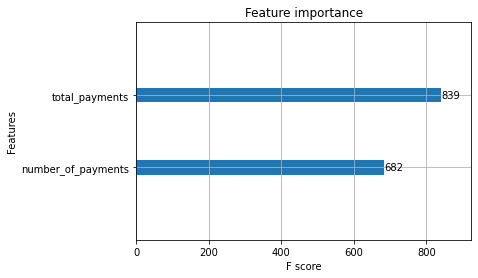

In [112]:
# feature importance plot
xgb.plot_importance(xgbc_opt)
plt.rcParams['figure.figsize'] = [12, 12]
plt.show()

Logistic Regression Model

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem  
  
Estimation: Maximum Likelihood

In [40]:
# creating a logistic regression classifier object 
log_reg = LogisticRegression()

In [41]:
# fitting the logistic regression model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# predicting on the test set
y_pred_lr = log_reg.predict(X_test)

In [43]:
# unique values (of a numpy array) of the predictions
np.unique(y_pred_lr, return_counts=True)

(array([0, 1]), array([782,   5]))

In [56]:
y_pred_lr.shape

(787,)

Model evaluation

In [54]:
# computing an accuracy score for the predictions (evaluating predictions)
accuracy_score(y_test, y_pred_lr)

0.9415501905972046

In [44]:
# computing the balanced accuracy score for the predictions
balanced_accuracy_score(y_test, y_pred_lr)

0.5089397349337335

In [45]:
# evaluation the predicted classifications using a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_lr)

conf_matrix

array([[740,   4],
       [ 42,   1]])

The Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity

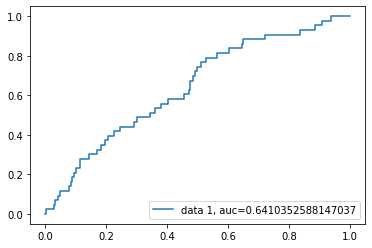

In [46]:
# Plotting the Receiver Operator Curve (ROC)
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable

In [47]:
# initializing a Gaussian Naive Bayes Classifier
gnb = GaussianNB()

In [48]:
# fitting the model to the training data
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
# obtaining predictions
y_pred_nb = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (y_test != y_pred_nb).sum()))

Number of mislabeled points out of a total 787 points : 62


In [51]:
# unique values (of a numpy array) of the predictions
np.unique(y_pred_nb, return_counts=True)

(array([0, 1]), array([762,  25]))

Model Evaluation

In [52]:
# computing the balanced accuracy score for the predictions
balanced_accuracy_score(y_test, y_pred_nb)

0.5200987746936734

In [58]:
# computing an accuracy score for the predictions (evaluating predictions)
accuracy_score(y_test, y_pred_nb)

0.9212198221092758

In [53]:
# evaluation the predicted classifications using a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_nb)

conf_matrix

array([[722,  22],
       [ 40,   3]])

Exporting the predicitions for a submission

Export predictions into csv file  
• Format: id, prediction  
• Predictions must be 0 or 1 (not 0.5, not ‘Yes’, not ‘FALSE’)  
• Must contain all instances of the original test dataset

In [101]:
final_preds = log_reg.predict(test[["number_of_payments","total_payments"]])

In [102]:
# storing the ids and the corresponding predictions as a combined dataframe

submission = pd.DataFrame()

submission["id"] = test["Physician_ID"]

submission["prediction"] = final_preds


submission



,id,prediction
0,14,1
1,18,1
2,42,0
3,46,0
4,47,1
...,...,...
995,5953,1
996,5959,0
997,5964,0
998,5972,1


In [106]:
# storing the submission data in a csv file
submission.to_csv('submission_1_team_sgs.csv', index=False) 

In [108]:
from google.colab import files
files.download("submission_1_team_sgs.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>